In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords

In [8]:
df = pd.read_csv("amazon_baby.csv")
df.head()

name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  
0  These flannel wipes are OK, but in my opinion ...       3  
1  it came early and was not disappointed. i love...       5  
2  Very soft and comfortable and warmer than it l...       5  
3  This is a product well worth the purchase.  I ...       5  
4  All of my kids have cried non-stop when I trie...       5

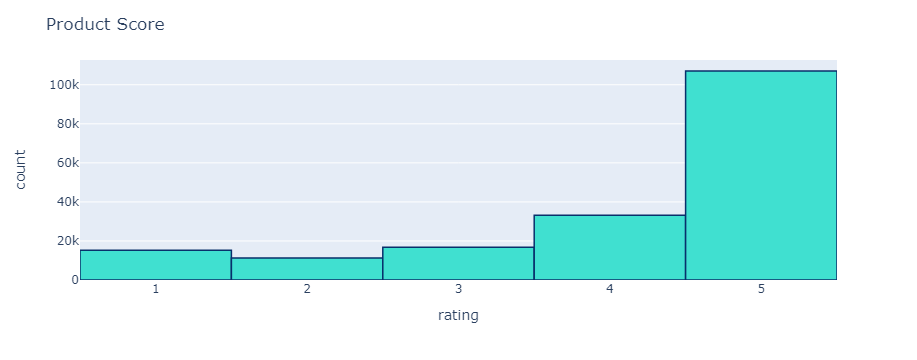

In [6]:
fig = px.histogram(df, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [10]:
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [12]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

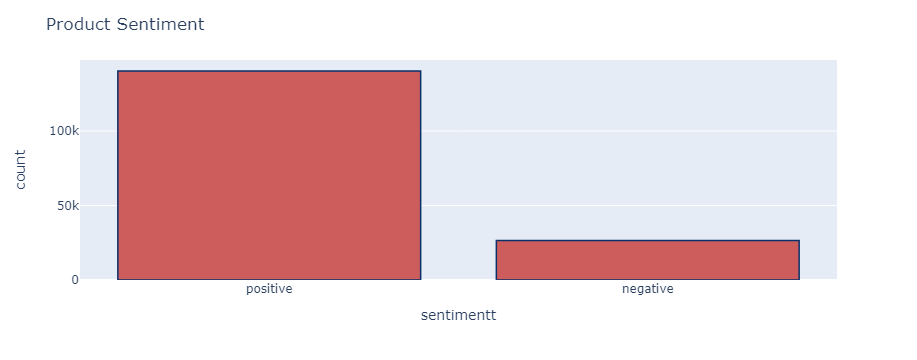

In [18]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [23]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df = df.dropna(subset=['review'])
df['review'] = df['review'].apply(remove_punctuation)

In [25]:
dfNew = df[['review','sentiment']]
dfNew.head()

review  sentiment
1  it came early and was not disappointed i love ...          1
2  Very soft and comfortable and warmer than it l...          1
3  This is a product well worth the purchase  I h...          1
4  All of my kids have cried non-stop when I trie...          1
5  When the Binky Fairy came to our house, we did...          1

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review'])
test_matrix = vectorizer.transform(test['review'])

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [36]:
lr.fit(X_train,y_train)

C:\Users\91751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
predictions = lr.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(predictions,y_test)

array([[ 3766,   823],
       [ 1479, 27127]], dtype=int64)

In [41]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.72      0.82      0.77      4589
           1       0.97      0.95      0.96     28606

    accuracy                           0.93     33195
   macro avg       0.84      0.88      0.86     33195
weighted avg       0.94      0.93      0.93     33195

